<a href="https://colab.research.google.com/github/Cherednikov77/goit-algo-fp/blob/main/Vectorsvalues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

values (lambda):
[3. 1.]
vectors (v) - matrix:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
values (lambda):
[-0.21699057  9.21699057]
vectorc (v) - matrix:
[[-0.84097147  0.62671124]
 [-0.54107946 -0.77925158]]


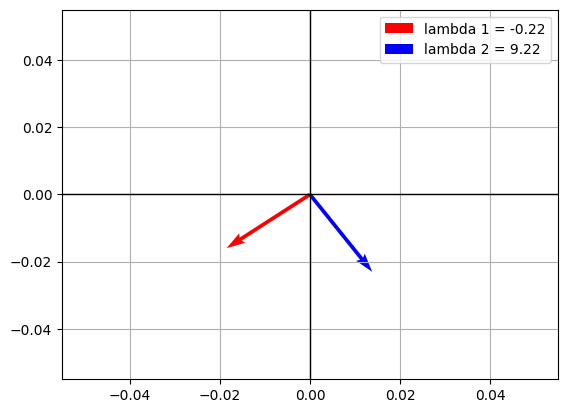

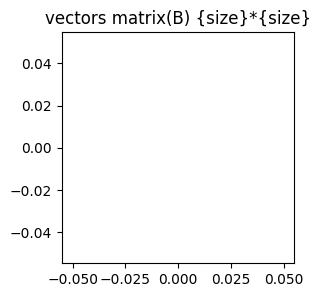

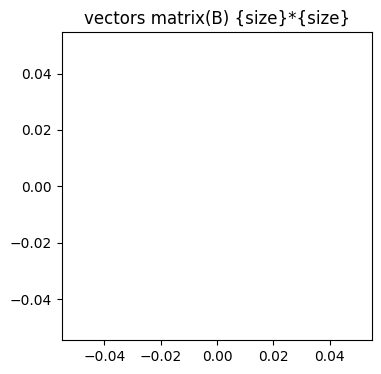

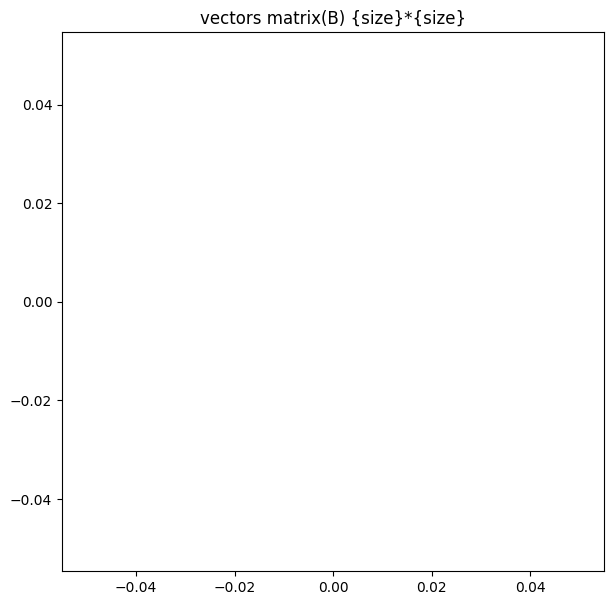

In [ ]:
import numpy as np
A = np.array ([[2, 1], [1, 2]])
B = np.array ([[3, -5], [-4,6]])
eigenvalues, eigenvectors = np.linalg.eig(A)
print("values (lambda):")
print(eigenvalues)
print("vectors (v) - matrix:")
print(eigenvectors)

eigenvalues, eigenvectors = np.linalg.eig (B)
print("values (lambda):")
print(eigenvalues)
print("vectorc (v) - matrix:")
print(eigenvectors)

import matplotlib.pyplot as plt
val, vac = np.linalg.eig(B)
origin = [0, 0]
plt.quiver(*origin, vac [0, 0], vac [1, 0], color = "r", scale = 5, label = f"lambda 1 = {val[0]:.2f}")
plt.quiver(*origin, vac [0, 1], vac [1, 1], color = "b", scale = 5, label = f"lambda 2 = {val[1]:.2f}")

plt.grid()
plt.axhline(0, color = "black", lw = 1)
plt.axvline(0, color = "black", lw = 1)
plt.legend()
for size in [3, 4, 7]:
    plt.figure(figsize = (size, size))
    plt.axis("equal")
    plt.title("vectors matrix(B) {size}*{size}")
    plt.show()






In [ ]:
from numpy import array
from numpy.linalg import cholesky
A = array([[36, 30, 18], [30, 41, 23], [18,23, 14]])
print(A)
L = cholesky(A)
print(L)
print(L.T)
B = L.dot(L.T)
print(B)




[[36 30 18]
 [30 41 23]
 [18 23 14]]
[[6. 0. 0.]
 [5. 4. 0.]
 [3. 2. 1.]]
[[6. 5. 3.]
 [0. 4. 2.]
 [0. 0. 1.]]
[[36. 30. 18.]
 [30. 41. 23.]
 [18. 23. 14.]]


<>:16: SyntaxWarning: invalid escape sequence '\.'
<>:16: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-3178705420.py:16: SyntaxWarning: invalid escape sequence '\.'
  path = "/111\.jpg"


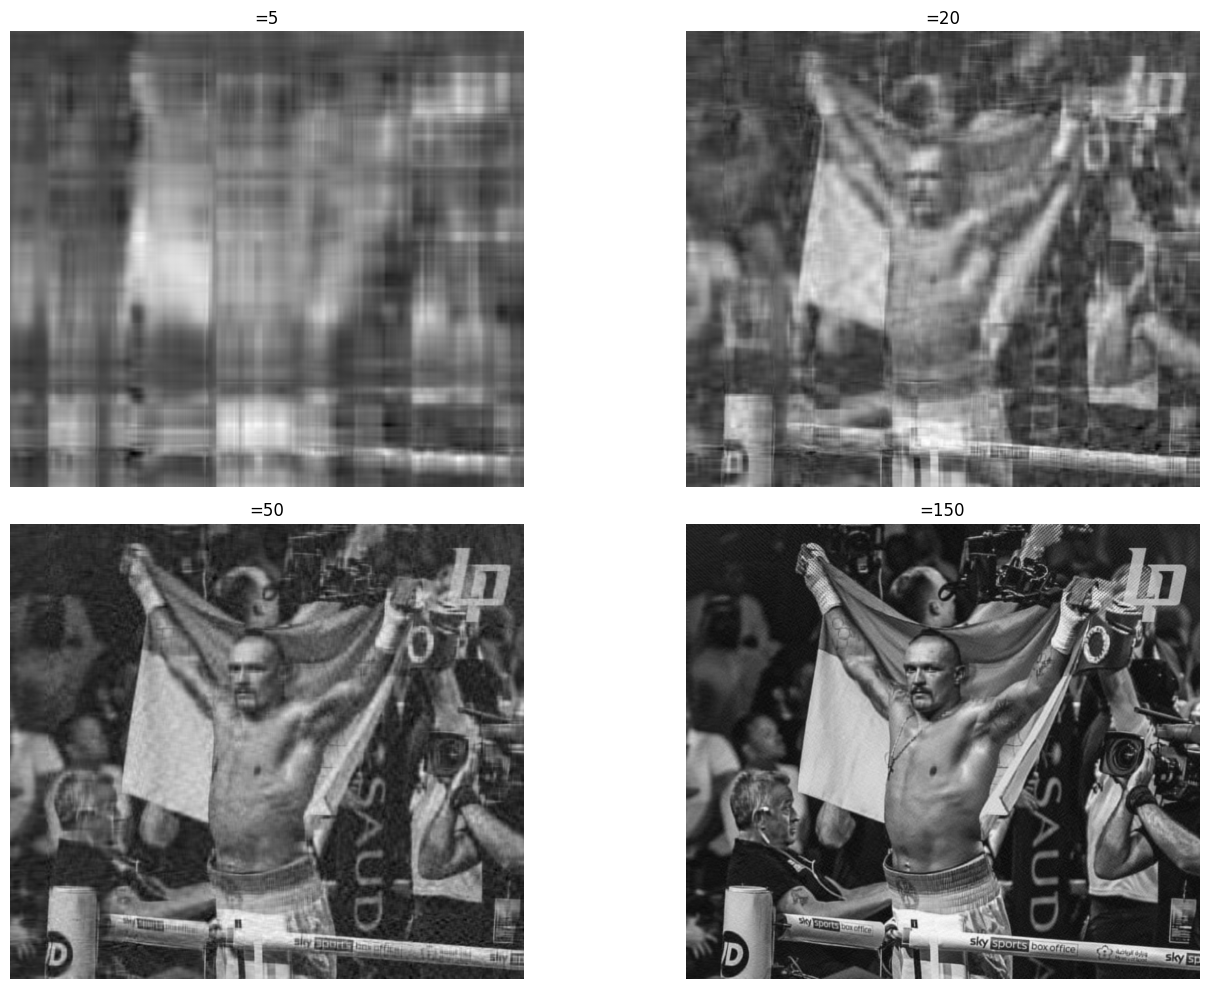

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def compress_image(image_pach, k):
    img = Image.open(image_pach).convert("L")
    img_mat = np.array(img)
    U, s, Vt = np.linalg.svd(img_mat, full_matrices = False)
    s_k = np.diag(s[:k])
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]

    img_compressed = np.dot(U_k, np.dot(s_k, Vt_k))
    return img_compressed

path = "/111\.jpg"
k_values = [5, 20, 50,150]
plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values):
    res = compress_image(path, k)
    plt.subplot(2, 2, i+1)
    plt.imshow(res, cmap = "gray")
    plt.title(f"={k}")
    plt.axis("off")
plt.tight_layout()
plt.show()








In [ ]:
import numpy as np

vec_c = np.cross([1, 2, 3], [4, 5, 6])
np.linalg.norm(vec_c)


np.float64(7.3484692283495345)

In [ ]:
import numpy as np
def calcolate_normal(p1, p2, p3):
    v1 = np.array(p2) - np.array(p1)
    v2 = np.array(p3) - np.array(p1)
    normal = np.cross(v1, v2)
    norm = np.linalg.norm(normal)
    return normal / norm if norm >0 else normal

A = [0, 0, 0]
B = [1, 0, 0]
C = [0, 1, 0]

print(f"normal: {calcolate_normal(A, B, C)}")





normal: [0. 0. 1.]


In [ ]:
import numpy as np

def parallelepiped_volume(a, b, c):

 mixed_dot_product = np.dot(a, np.cross(b, c))
 volume = abs(mixed_dot_product)

 return volume

a = np.array([2, -2, -3])
b = np.array([4, 0, 6])
c = np.array([-7, -7, 1])

volume = parallelepiped_volume(a, b, c)
print("Volume parallelipiped is", volume)


Volume parallelipiped is 260


renovation pixel: 155.50
tensor form: torch.Size([3, 1215, 927])
Ready for. Size for entrance: torch.Size([1, 3, 1215, 927])
Start up restavration...


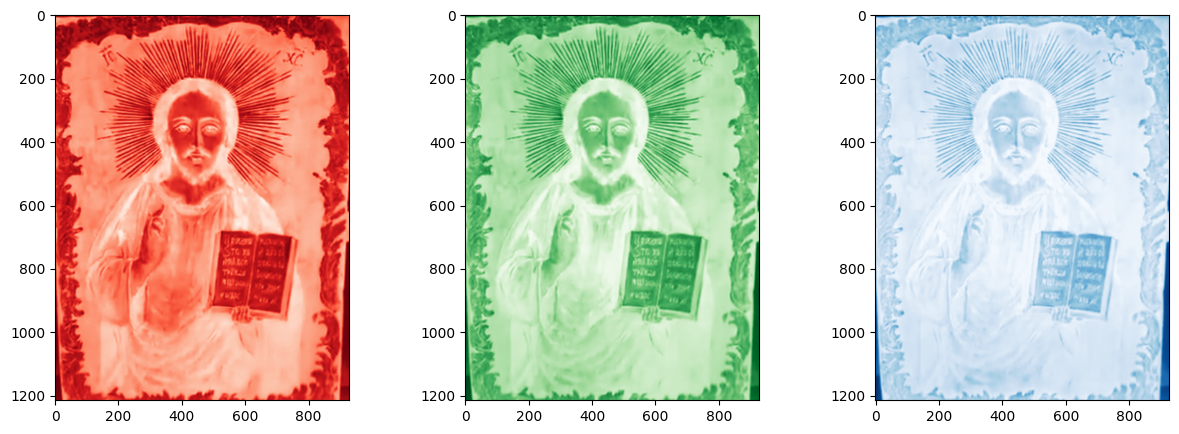

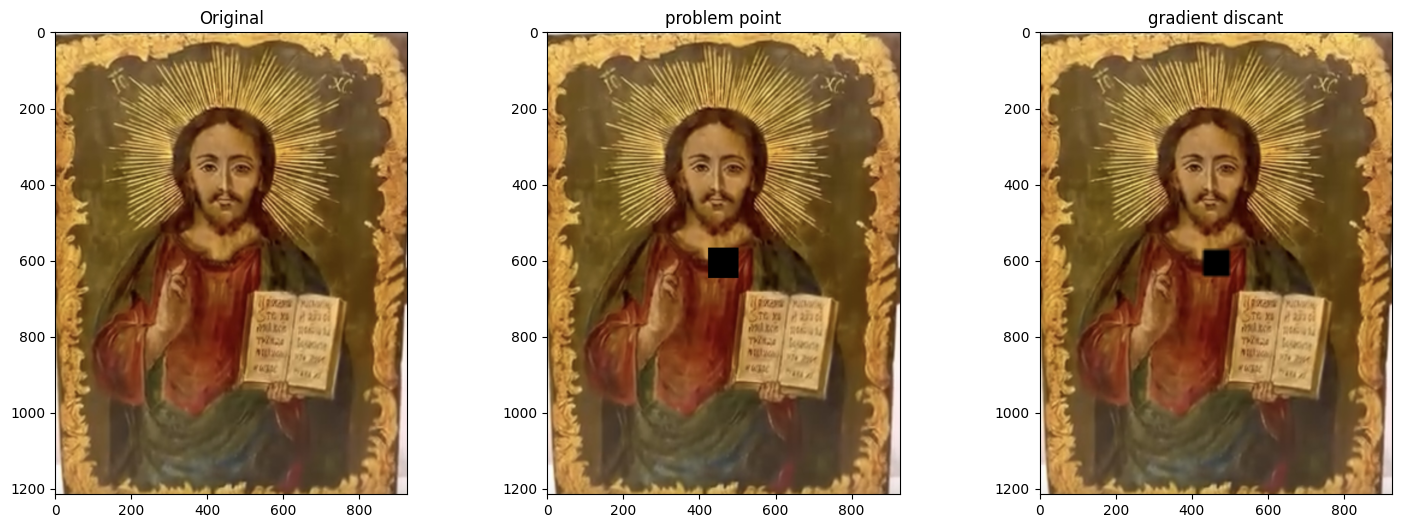

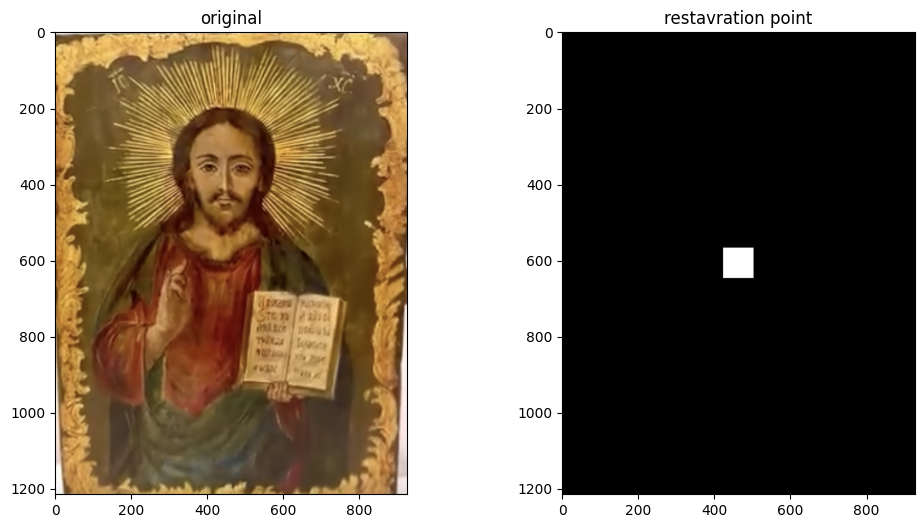

In [21]:
import numpy as np
import torch
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt



ikona_fragment = np.array([
    [150, 155, 160, 162, 165],
    [148, 153, 158, 161, 164],
    [145, 150, 0,   159, 162],
    [142, 148, 155, 158, 160],
    [140, 145, 152, 155, 158]
], dtype=float)

def repair_step(img, x, y, learning_rate=0.1):
    target_value = (img[x-1, y] + img[x+1, y] + img[x, y-1] + img[x, y+1]) / 4
    loss_gradient = img[x, y] - target_value
    img[x, y] -= learning_rate * loss_gradient
    return img

for _ in range(100):
    ikona_fragment = repair_step(ikona_fragment, 2, 2)

print(f"renovation pixel: {ikona_fragment[2, 2]:.2f}")

img = Image.open("/IMG_6310.jpeg").convert("RGB")
transform = T.Compose([T.ToTensor(), ])
ikona_tensor = transform(img)

print(f"tensor form: {ikona_tensor.shape}")

mask = torch.zeros((1, ikona_tensor.shape[1], ikona_tensor.shape[2]))
mask[:, 100:200, 150:250] = 1.0

red_channel = ikona_tensor[0, :, :]
green_channel = ikona_tensor[1, :, :]
blue_channel = ikona_tensor[2, :, :]


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(red_channel, cmap='Reds')
axs[1].imshow(green_channel, cmap='Greens')
axs[2].imshow(blue_channel, cmap='Blues')


input_img = ikona_tensor.unsqueeze(0)
input_mask = mask.unsqueeze(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_img = input_img.to(device)
input_mask = input_mask.to(device)

print(f"Ready for. Size for entrance: {input_img.shape}")

velocity = torch.zeros_like(ikona_tensor)

def repair_step_with_momentum(img, x, y, v, lr=0.1, momentum=0.9):
    target = (img[:, x-1, y] + img[:, x+1, y] + img[:, x, y-1] + img[:, x, y+1]) / 4
    grad = img[:, x, y] - target
    v[:, x, y] = momentum * v[:, x, y] + lr * grad
    img[:, x, y] -= v[:, x, y]

    return img, v


h, w = ikona_tensor.shape[1], ikona_tensor.shape[2]
cy, cx = h // 2, w // 2
size = 40

mask = torch.zeros((1, h, w))
mask[:, cy-size:cy+size, cx-size:cx+size] = 1.0




restored_tensor = ikona_tensor.clone()
restored_tensor[:, cy-size:cy+size, cx-size:cx+size] = 0


velocity = torch.zeros_like(restored_tensor)


print("Start up restavration...")

for _ in range(50):

    for y in range(cy-size, cy+size):
        for x in range(cx-size, cx+size):
            restored_tensor, velocity = repair_step_with_momentum(
                restored_tensor, y, x, velocity, lr=0.1, momentum=0.9
            )


fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(ikona_tensor.permute(1, 2, 0))
ax[0].set_title("Original")
damaged_view = ikona_tensor.clone()
damaged_view[:, cy-size:cy+size, cx-size:cx+size] = 0
ax[1].imshow(damaged_view.permute(1, 2, 0))
ax[1].set_title("problem point")
ax[2].imshow(restored_tensor.permute(1, 2, 0).clamp(0, 1))
ax[2].set_title("gradient discant")

plt.show()



img_to_show = ikona_tensor.permute(1, 2, 0).numpy()
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img_to_show)
ax[0].set_title("original")
ax[1].imshow(mask[0], cmap='gray')
ax[1].set_title("restavration point")

plt.show()

1.Добираємо библіотекі які у процессі доповнювати будемо. 2.Розраховуємо данні для градиєнтів навкругі області 0. 3.Встановлюємо помилковий градієнт та оновлюємо значення пікселя на встановленоі області. 4.Задаємо 100 повторень градієнтного спуску у циклі.  5.Результат значення пікселя. 6.Завантажуємо фото оюєкту. 7.Трансформуємо у обєкт тензор та виводимо. 8.Робимо такого ж розміру чорну маску з містом майбутьньої реставрації.  9.Встановлюємо кольорі які є основними. 10.Починаємо адаптувати код для роботи моделі з реставрауиї. 11.додаємо для нейромережи розмірність батча. 12.Повертаємо обєкт для зарісовкі за допомогою matplotlib.  12.Повертаємо тензор у катринку. 13.Виводимо результат

In [ ]:
mport numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=500, noise=0.20, random_state=42)
y = y.reshape(-1, 1) # Преобразуем y в столбец (500, 1)



1.готуємо дані з sklear (make_moons) 2.